# Jupyter Data Science Workflow

### Exploratory analysis workflow example



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#import os
#from urllib.request import urlretrieve
#import pandas as pd

#URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

#def get_freemont_data(filename='Freemont.csv', url=URL, force_download=False):
#    if force_download or not os.path.exists(filename):
#        urlretrieve(url, filename)
#    data = pd.read_csv('Freemont.csv', index_col='Date', parse_dates=True)
#    data.columns = ['West', 'East']
#    data['Total'] = data['West'] + data['East']
#    return data

In [3]:
from jupyterworkflow.data import get_freemont_data

In [4]:
data = get_freemont_data()
data.head()

,West,East,Total
Date,,,
2019-02-28 23:00:00,5.0,6.0,11.0
2019-02-28 22:00:00,4.0,27.0,31.0
2019-02-28 21:00:00,16.0,32.0,48.0
2019-02-28 20:00:00,16.0,50.0,66.0
2019-02-28 19:00:00,39.0,59.0,98.0


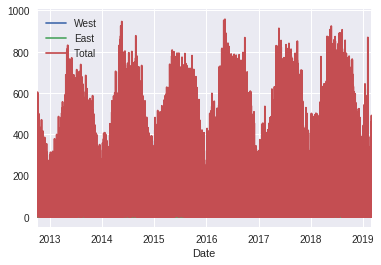

In [5]:
data.plot()  # too many samples, data steps on each other

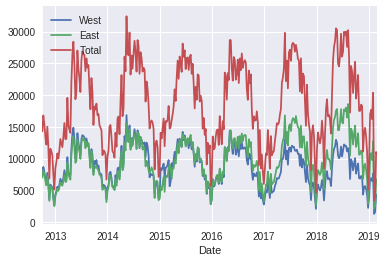

In [6]:
data.resample('W').sum().plot();

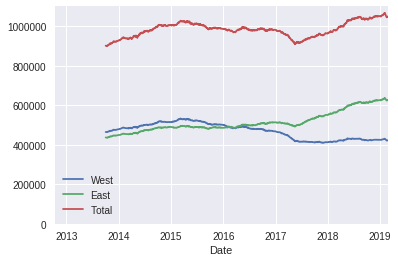

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

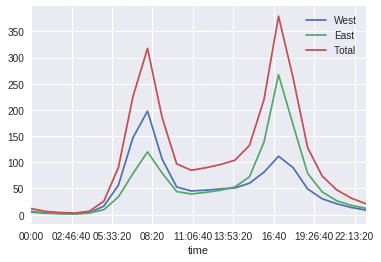

In [8]:
data.groupby(data.index.time).mean().plot();

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


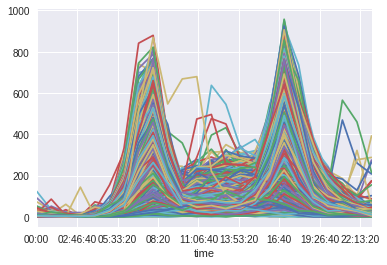

In [10]:
pivoted.plot(legend=False)

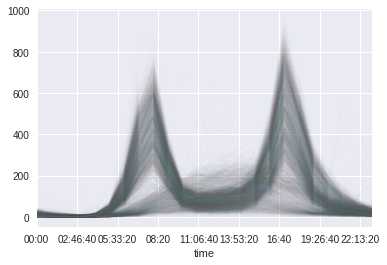

In [11]:
pivoted.plot(legend=False, alpha=0.01)

In [12]:
get_freemont_data?